# Data Preprocessing and Feature Engineering for Online Gaming Behavior Dataset

This notebook demonstrates data preprocessing steps including handling missing values, feature selection, feature extraction, feature encoding, dimensionality reduction (PCA, LDA, t-SNE, Autoencoders), and model evaluation (train-test split, cross-validation, hyperparameter tuning) for predictive modeling.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [4]:
# Load the dataset
file_path = 'Online_gaming_behaviour.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

(None,
    PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
 0      9000   43    Male    Other  Strategy      16.271119                0   
 1      9001   29  Female      USA  Strategy       5.525961                0   
 2      9002   22  Female      USA    Sports       8.223755                0   
 3      9003   35    Male      USA    Action       5.265351                1   
 4      9004   33    Male   Europe    Action      15.531945                0   
 
   GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
 0         Medium                6                        108           79   
 1         Medium                5                        144           11   
 2           Easy               16                        142           35   
 3           Easy                9                         85           57   
 4         Medium                2                        131           95   
 
    AchievementsUnlocked EngagementLevel 

In [5]:
# Handling missing values
# For numerical columns, fill missing values with the mean
for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].mean(), inplace=True)

# For categorical columns, fill missing values with the mode
for column in data.select_dtypes(include=[object]).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)



In [6]:
# Data transformation: Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


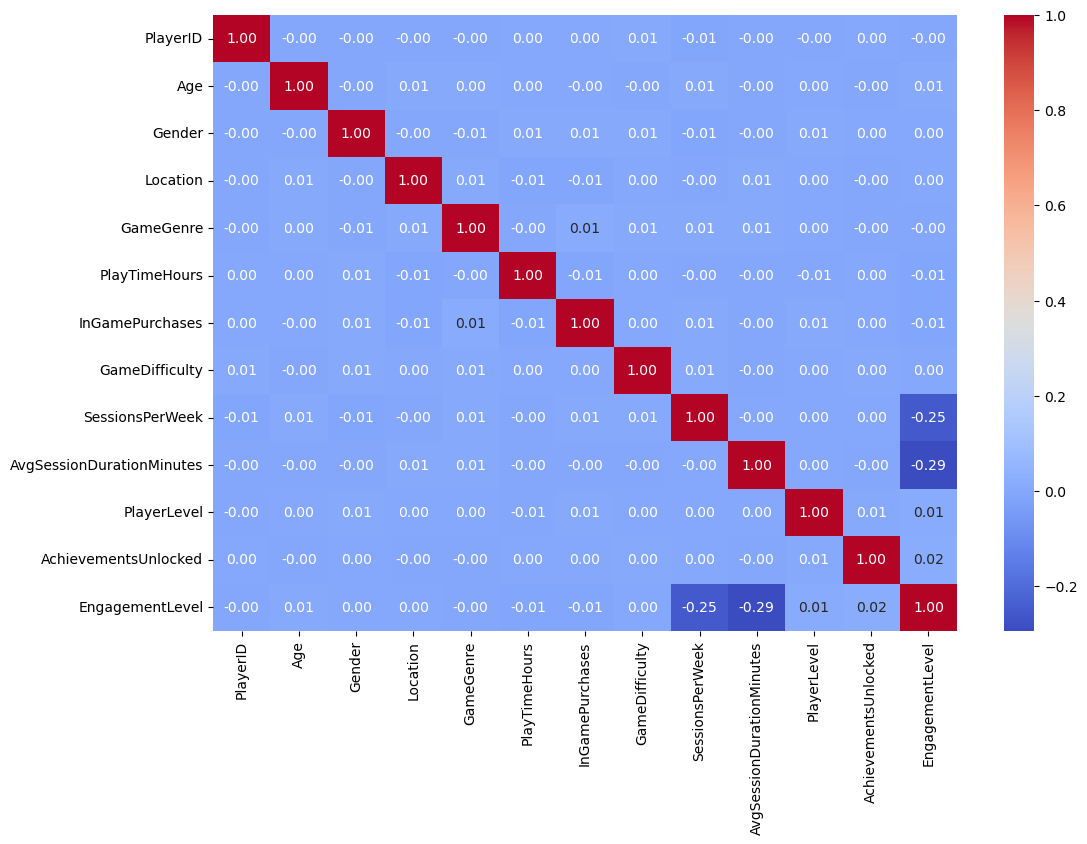

In [7]:
# Feature Selection: Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [8]:
# Splitting the data into features and target variable
X = data.drop(columns=['GameGenre'])  # Replace 'target_column' with the actual target column name
y = data['InGamePurchases']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [11]:
# Dimensionality Reduction using LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)


In [14]:
# Dimensionality Reduction using Autoencoders
input_dim = X_train_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)
encoder_model = Model(inputs=input_layer, outputs=encoder)

X_train_ae = encoder_model.predict(X_train_scaled)
X_test_ae = encoder_model.predict(X_test_scaled)


Epoch 1/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2001 - val_loss: 0.9967
Epoch 2/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9796 - val_loss: 0.9409
Epoch 3/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9400 - val_loss: 0.9285
Epoch 4/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9313 - val_loss: 0.9231
Epoch 5/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9264 - val_loss: 0.9193
Epoch 6/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9263 - val_loss: 0.9157
Epoch 7/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9172 - val_loss: 0.9108
Epoch 8/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9107 - val_loss: 0.8994
Epoch 9/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9023 - val_loss: 0.8923
Epoch 10/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9000 - val_loss: 0.8873
Epoch 11/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8900 - val_loss: 0.8836
Epoch 12/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [15]:
# Model Training and Evaluation using Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = auc(*roc_curve(y_test, y_pred)[:2])

print(f'Confusion Matrix:\\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC AUC: {roc_auc}')


Confusion Matrix:\n[[6377    0]
 [   0 1630]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0


In [17]:
# Grid Search for Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\shubh\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [18]:
# Random Search for Hyperparameter Tuning
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print(f'Best Parameters: {random_search.best_params_}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}


In [19]:
# Cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
